## **Perhitungan Manual**

---


Import Library

In [1]:
import numpy as np
import pandas as pd

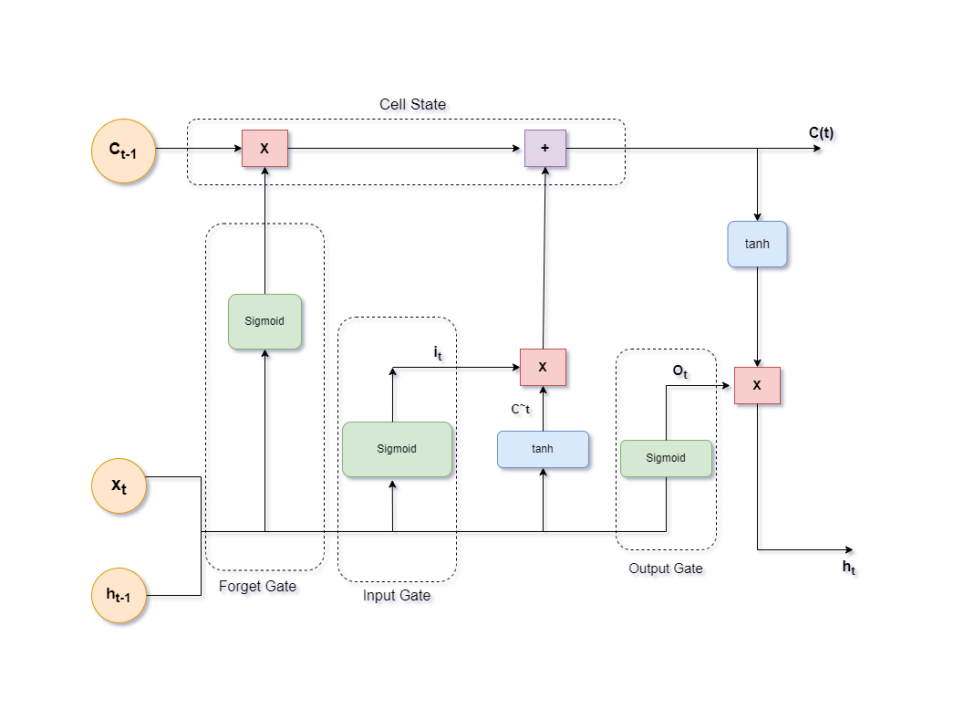

## Input Data

### 1. Input Kata

In [674]:
# output cnn 
# Inisialisasi data masukan
x_t = np.array([0,0,3.4373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
# x_t = np.array([0])

# Ubah bentuk data masukan agar sesuai dengan input shape LSTM
# LSTM layer mengharapkan input dalam bentuk (batch_size, timesteps, features)
x_t = x_t.reshape(25, 1)

print(x_t.shape)

(25, 1)


In [675]:
x_t.shape

(25, 1)

In [676]:
print(x_t)

[[0.    ]
 [0.    ]
 [3.4373]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]
 [0.    ]]


### 2. Hidden State Awal

$$ h_{f-1} = \text{Bobot Awal} $$
$$ b_{f-1} = \text{Bias Awal} $$

In [677]:

units = 1

In [678]:
h_t_minus_1 = np.zeros(units)
c_t_minus_1 = np.zeros(units)

In [679]:
h_t_minus_1
c_t_minus_1

array([0.])

In [680]:
h_t_minus_1.shape
c_t_minus_1.shape

(1,)

## Bobot dan Bias

### 1. Forget Gate

- $W_f$: Bobot input untuk forget gate
- $U_f$: Bobot hidden state untuk forget gate
- $b_f$: Bias untuk forget gate

In [681]:
# Ukuran bobot dan bias
input_dim = x_t.shape[1] #jumlah fitur nya cuman satu
input_dim

1

In [3]:
def glorot_uniform(shape):
    fan_in, fan_out = shape[0], shape[1]
    limit = np.sqrt(6 / (fan_in + fan_out))
    weights = np.random.uniform(-limit, limit, size=shape)
    return np.round(weights, 2)


In [683]:
# W_f = glorot_uniform((input_dim, units))
# U_f = glorot_uniform((units, units))
# b_f = np.zeros(units)  # Bias sering diinisialisasi dengan nol

In [684]:
W_f = pd.read_csv('./bobot-lstm/bobot-baru/W_f.csv', header=None, skiprows=1)
U_f = pd.read_csv('./bobot-lstm/bobot-baru/U_f.csv',  header=None, skiprows=1)
b_f = pd.read_csv('./bobot-lstm/bobot-baru/b_f.csv', header=None, skiprows=1)
W_f = W_f.to_numpy()
U_f = U_f.to_numpy()
b_f = b_f.to_numpy()

print(W_f)
print(U_f)

[[-0.96]]
[[0.01]]


In [685]:
W_f.shape
print(W_f.shape)

(1, 1)


In [686]:
x_t_timestep1 = x_t[0][0]

In [687]:
x_t_timestep1

0.0

In [688]:
coba = np.dot(x_t_timestep1, W_f)
print("X_t" + str(x_t_timestep1))
print("Bobot" + str(W_f))
print(coba)

X_t0.0
Bobot[[-0.96]]
[[-0.]]


In [689]:
# # save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(W_f)
# df.to_csv('./bobot-lstm/bobot-baru/W_f.csv', index=False)

# df = pd.DataFrame(U_f)
# df.to_csv('./bobot-lstm/bobot-baru/U_f.csv', index=False)

# df = pd.DataFrame(b_f)
# df.to_csv('./bobot-lstm/bobot-baru/b_f.csv', index=False)

In [690]:
print('Bobot Input : \n' ,W_f)
print('Bobot Hidden : \n', U_f)
print('Bias : \n',b_f)

Bobot Input : 
 [[-0.96]]
Bobot Hidden : 
 [[0.01]]
Bias : 
 [[0.]]


In [691]:
print(W_f.shape)
print(U_f.shape)
print(b_f.shape)

(1, 1)
(1, 1)
(1, 1)


### 2. Input Gate

- $W_i$: Bobot input untuk input gate
- $U_i$: Bobot hidden state untuk input gate
- $b_i$: Bias untuk input gate

In [692]:
W_i = pd.read_csv('./bobot-lstm/bobot-baru/W_i.csv', header=None, skiprows=1)
U_i = pd.read_csv('./bobot-lstm/bobot-baru/U_i.csv',  header=None, skiprows=1)
b_i = pd.read_csv('./bobot-lstm/bobot-baru/b_i.csv', header=None, skiprows=1)
W_i = W_i.to_numpy()
U_i = U_i.to_numpy()
b_i = b_i.to_numpy()

print(W_i)
print(U_i)


[[-0.48]]
[[-1.46]]


In [693]:
# W_i = glorot_uniform((input_dim, units))
# U_i = glorot_uniform((units, units))
# b_i = np.zeros(units)  # Bias sering diinisialisasi dengan nol

In [694]:
print('Bobot Input : \n' ,W_i)
print('Bobot Hidden : \n', U_i)
print('Bias : \n',b_i)

Bobot Input : 
 [[-0.48]]
Bobot Hidden : 
 [[-1.46]]
Bias : 
 [[0.]]


In [695]:
# save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(W_i)
# df.to_csv('./bobot-lstm/bobot-baru/W_i.csv', index=False)

# df = pd.DataFrame(U_i)
# df.to_csv('./bobot-lstm/bobot-baru/U_i.csv', index=False)

# df = pd.DataFrame(b_i)
# df.to_csv('./bobot-lstm/bobot-baru/b_i.csv', index=False)

### 3. Cell State

- $W_c$: Bobot input untuk cell state candidate
- $U_c$: Bobot hidden state untuk cell state candidate
- $b_c$: Bias untuk cell state candidate

In [696]:
# W_c = glorot_uniform((input_dim, units))
# U_c = glorot_uniform((units, units))
# b_c = np.zeros(units)  # Bias sering diinisialisasi dengan nol

In [697]:
W_c = pd.read_csv('./bobot-lstm/bobot-baru/W_c.csv', header=None, skiprows=1)
U_c = pd.read_csv('./bobot-lstm/bobot-baru/U_c.csv',  header=None, skiprows=1)
b_c = pd.read_csv('./bobot-lstm/bobot-baru/b_c.csv', header=None, skiprows=1)
W_c = W_c.to_numpy()
U_c = U_c.to_numpy()
b_c = b_c.to_numpy()

print(W_c)
print(U_c)


[[0.71]]
[[0.32]]


In [698]:
print('Bobot Input : \n' ,W_c)
print('Bobot Hidden : \n', U_c)
print('Bias : \n',b_c)

Bobot Input : 
 [[0.71]]
Bobot Hidden : 
 [[0.32]]
Bias : 
 [[0.]]


In [699]:
# # save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(W_c)
# df.to_csv('./bobot-lstm/bobot-baru/W_c.csv', index=False)

# df = pd.DataFrame(U_c)
# df.to_csv('./bobot-lstm/bobot-baru/U_c.csv', index=False)

# df = pd.DataFrame(b_c)
# df.to_csv('./bobot-lstm/bobot-baru/b_c.csv', index=False)

### 4. Output Gate

- $W_o$: Bobot input untuk output gate
- $U_o$: Bobot hidden state untuk output gate
- $b_o$: Bias untuk output gate

In [700]:
# W_o = glorot_uniform((input_dim, units))
# U_o = glorot_uniform((units, units))
# b_o = np.zeros(units)  # Bias sering diinisialisasi dengan nol

In [701]:
W_o = pd.read_csv('./bobot-lstm/bobot-baru/W_o.csv', header=None, skiprows=1)
U_o = pd.read_csv('./bobot-lstm/bobot-baru/U_o.csv',  header=None, skiprows=1)
b_o = pd.read_csv('./bobot-lstm/bobot-baru/b_o.csv', header=None, skiprows=1)
W_o = W_o.to_numpy()
U_o = U_o.to_numpy()
b_o = b_o.to_numpy()

print(W_o)
print(U_o)


[[-0.95]]
[[0.62]]


In [702]:
print('Bobot Input : \n' ,W_o)
print('Bobot Hidden : \n', U_o)
print('Bias : \n',b_o)

Bobot Input : 
 [[-0.95]]
Bobot Hidden : 
 [[0.62]]
Bias : 
 [[0.]]


In [703]:
# # save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(W_o)
# df.to_csv('./bobot-lstm/bobot-baru/W_o.csv', index=False)

# df = pd.DataFrame(U_o)
# df.to_csv('./bobot-lstm/bobot-baru/U_o.csv', index=False)

# df = pd.DataFrame(b_o)
# df.to_csv('./bobot-lstm/bobot-baru/b_o.csv', index=False)

## Fungsi Aktivasi

### 1. Sigmoid

**Rumus:**
$$ \text{sigmoid}(x) = \frac{1}{1 + e^{-x}} $$

**Variabel:**

- **$x$**: Nilai input yang akan diubah oleh fungsi sigmoid. Ini bisa berupa output dari layer sebelumnya dalam jaringan neural.
- **$e$**: Bilangan Euler (sekitar 2.71828), yang merupakan basis dari logaritma alami.
- **$\text{sigmoid}(x)$**: Output dari fungsi sigmoid, yang akan berada dalam rentang (0, 1).





In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


### 2. Softmax

**Rumus:**
$$ \text{softmax}(x) = \frac{e^{x - \max(x)}}{\sum e^{x - \max(x)}} $$

**Variabel:**
- **$x$**: Vektor input yang berisi nilai mentah (logit) untuk setiap kelas.
- **$x_i$**: Nilai input untuk kelas ke-$i$.
- **$\max(x)$**: Nilai maksimum dalam vektor $x$. Ini sering digunakan untuk stabilitas numerik agar nilai eksponensial tidak menjadi terlalu besar.
- **$e$**: Bilangan Euler (sekitar 2.71828).
- **$\text{softmax}(x_i)$**: Output dari fungsi softmax untuk kelas ke-$i$, yang merupakan probabilitas prediksi untuk kelas tersebut.
- **$\sum_{j}$**: Penjumlahan nilai eksponensial dari semua kelas $j$.




In [15]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)


## Tahapan

### 1. Forget Gate

**Rumus:**
$$ f_t = \sigma(W_f \cdot x_t + U_f \cdot h_{t-1} + b_f) $$

**Variabel:**

- $f_t$: Forget gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_f$: Bobot input untuk forget gate
- $x_t$: Input pada waktu $t$
- $U_f$: Bobot hidden state untuk forget gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_f$: Bias untuk forget gate



In [16]:
def forget_gate(x_t, h_t_minus_1, W_f, U_f, b_f):
    return (np.dot(x_t, W_f) + np.dot(h_t_minus_1, U_f) + b_f)


In [17]:
def calculate_forget_gate(f_t):
    return sigmoid(f_t)


In [708]:
f_t = forget_gate(x_t_timestep1, h_t_minus_1, W_f, U_f, b_f)
print(f"f_t {W_f} x {x_t_timestep1} \n + {h_t_minus_1} x {U_f} \n + {b_f}")
print(f" Hasil Forget Gate: {f_t}")

f_t [[-0.96]] x 0.0 
 + [0.] x [[0.01]] 
 + [[0.]]
 Hasil Forget Gate: [[0.]]


In [709]:
f_t.shape

(1, 1)

In [710]:
print(f"Hasil Forget Gate: {f_t}")

Hasil Forget Gate: [[0.]]


In [711]:
# # save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(f_t)
# df.to_csv('./bobot-lstm/bobot-baru/f_t.csv', index=False)

In [712]:
f_t = calculate_forget_gate(f_t)
print(f"Hasil Sigmoid Forget Gate: {f_t}")



Hasil Sigmoid Forget Gate: [[0.5]]


In [713]:
# # save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(f_t)
# df.to_csv('./bobot-lstm/bobot-baru/f_t_sigmoid.csv', index=False)

In [714]:
f_t.shape

(1, 1)

### 2. Input Gate

**Rumus:**
$$ i_t = \sigma(W_i \cdot x_t + U_i \cdot h_{t-1} + b_i) $$

**Variabel:**
- $i_t$: Input gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_i$: Bobot input untuk input gate
- $x_t$: Input pada waktu $t$
- $U_i$: Bobot hidden state untuk input gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_i$: Bias untuk input gate

In [18]:
def input_gate(x_t, h_t_minus_1, W_i, U_i, b_i):
    return (np.dot(x_t, W_i) + np.dot(h_t_minus_1, U_i) + b_i)

In [19]:
def calculate_input_gate(i_t):
    return sigmoid(i_t)

In [717]:
i_t = input_gate(x_t_timestep1, h_t_minus_1, W_i, U_i, b_i)
print(f"i_t {W_i} x {x_t_timestep1} \n + {h_t_minus_1} x {U_i} \n + {b_i}")
print(f"Hasil Input Gate: {i_t}")

i_t [[-0.48]] x 0.0 
 + [0.] x [[-1.46]] 
 + [[0.]]
Hasil Input Gate: [[0.]]


In [718]:
# # save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(i_t)
# df.to_csv('./bobot-lstm/bobot-baru/i_t.csv', index=False)

In [719]:
i_t = calculate_input_gate(i_t)
print(f"Hasil Sigmoid Input Gate: {i_t}")



Hasil Sigmoid Input Gate: [[0.5]]


In [720]:
# # save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(i_t)
# df.to_csv('./bobot-lstm/bobot-baru/i_t_sigmoid.csv', index=False)

In [721]:
i_t.shape

(1, 1)

### 3. Candidate Cell

**Rumus:**
$$ \tilde{c}_t = \tanh(W_c \cdot x_t + U_c \cdot h_{t-1} + b_c) $$

**Variabel:**
- $\tilde{c}_t$: Kandidat cell state pada waktu $t$
- $\tanh$: Fungsi tanh
- $W_c$: Bobot input untuk cell state candidate
- $x_t$: Input pada waktu $t$
- $U_c$: Bobot hidden state untuk cell state candidate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_c$: Bias untuk cell state candidate



In [20]:
def candidate(x_t, h_t_minus_1, W_c, U_c, b_c):
    return (np.dot(x_t, W_c) + np.dot(h_t_minus_1, U_c) + b_c)

In [723]:
c_tilde_t = candidate(x_t_timestep1, h_t_minus_1, W_c, U_c, b_c)
print(f"c_tilde_t {W_c} x {x_t_timestep1} \n + {h_t_minus_1} x {U_c} \n + {b_c}")
print(f"Cell State Candidate: {c_tilde_t}")


c_tilde_t [[0.71]] x 0.0 
 + [0.] x [[0.32]] 
 + [[0.]]
Cell State Candidate: [[0.]]


In [724]:
# # save to dataframe and csv

# import pandas as pd

# df = pd.DataFrame(c_tilde_t)

# df.to_csv('./bobot-lstm/bobot-baru/c_tilde_t.csv', index=False)



In [22]:
def candidate_state(c_tilde_t):
    return np.tanh(c_tilde_t)

# c_tilde_t = candidate_state(c_tilde_t)
# print(f"Hasil tanh Cell State Candidate: {c_tilde_t}")

# # save to dataframe and csv
# import pandas as pd

# df = pd.DataFrame(c_tilde_t)
# df.to_csv('./bobot-lstm/bobot-baru/c_tilde_t_tanh.csv', index=False)

### 4. Cell State Update

**Rumus:**
$$ c_t = f_t \cdot c_{t-1} + i_t \cdot \tilde{c}_t $$

**Variabel:**
- $c_t$: Cell state pada waktu $t$
- $f_t$: Forget gate activation pada waktu $t$
- $c_{t-1}$: Cell state pada waktu $t-1$
- $i_t$: Input gate activation pada waktu $t$
- $\tilde{c}_t$: Kandidat cell state pada waktu $t$


In [23]:
def calculate_cell_state(f_t, c_t_minus_1, i_t, c_tilde_t):
    return f_t * c_t_minus_1 + i_t * c_tilde_t

In [25]:
# c_t = calculate_cell_state(f_t, c_t_minus_1, i_t, c_tilde_t)
# print(f"f_t {f_t} x {c_t_minus_1} + i_t {i_t} x {c_tilde_t}")
# print(f"Hasil Cell State: {c_t}")

In [728]:
# # save to dataframe and csv

# import pandas as pd

# df = pd.DataFrame(c_t)

# df.to_csv('./bobot-lstm/bobot-baru/c_t.csv', index=False)

### 5. Output Gate

**Rumus:**
$$ o_t = \sigma(W_o \cdot x_t + U_o \cdot h_{t-1} + b_o) $$

**Variabel:**
- $o_t$: Output gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_o$: Bobot input untuk output gate
- $x_t$: Input pada waktu $t$
- $U_o$: Bobot hidden state untuk output gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_o$: Bias untuk output gate



In [26]:
def output_gate(x_t, h_t_minus_1, W_o, U_o, b_o):
    return (np.dot(x_t, W_o) + np.dot(h_t_minus_1, U_o) + b_o)

In [730]:
o_t = output_gate(x_t_timestep1, h_t_minus_1, W_o, U_o, b_o)
print(f"o_t {W_o} x {x_t_timestep1} \n + {h_t_minus_1} x {U_o} \n + {b_o}")
print(f"Hasil Output Gate: {o_t}")

o_t [[-0.95]] x 0.0 
 + [0.] x [[0.62]] 
 + [[0.]]
Hasil Output Gate: [[0.]]


In [731]:
# # save to dataframe and csv

# import pandas as pd

# df = pd.DataFrame(o_t)

# df.to_csv('./bobot-lstm/bobot-baru/o_t.csv', index=False)

In [27]:
def calculate_output_gate(o_t):
    return sigmoid(o_t)

# o_t = calculate_output_gate(o_t)

# print(f"Hasil Sigmoid Output Gate: {o_t}")


# df = pd.DataFrame(o_t)
# df.to_csv('./bobot-lstm/bobot-baru/o_t_sigmoid.csv', index=False)

## 6. Hidden State Update

**Rumus:**
$$ h_t = o_t \cdot \tanh(c_t) $$

**Variabel:**
- $h_t$: Hidden state pada waktu $t$
- $o_t$: Output gate activation pada waktu $t$
- $\tanh$: Fungsi tanh
- $c_t$: Cell state pada waktu $t$


In [28]:
def calculate_hidden_state(o_t, c_t):
    return o_t * np.tanh(c_t)

In [734]:
# h_t = calculate_hidden_state(o_t, c_t)
# print(f"o_t {o_t} x tanh({c_t})")
# print(f"Hidden State: {h_t}")

o_t [[0.5]] x tanh([[0.]])
Hidden State: [[0.]]


In [735]:
# c_prev = c_t.reshape(1)
# h_prev = h_t.reshape(1)


# print(f"Final Cell State: {c_prev}")
# print(f"Final Hidden State: {h_prev}")





Final Cell State: [0.]
Final Hidden State: [0.]


In [736]:
# df = pd.DataFrame(c_prev)
# df.to_csv('./bobot-lstm/bobot-baru/c_prev.csv', index=False)

# df = pd.DataFrame(h_prev)
# df.to_csv('./bobot-lstm/bobot-baru/h_prev.csv', index=False)


In [737]:
print(x_t.shape)
print(h_t_minus_1.shape)
print(c_t_minus_1.shape)
print(W_f.shape)
print(U_f.shape)
print(b_f.shape)
print(W_i.shape)
print(U_i.shape)
print(b_i.shape)
print(W_c.shape)
print(U_c.shape)
print(b_c.shape)
print(W_o.shape)
print(U_o.shape)
print(b_o.shape)

(25, 1)
(1,)
(1,)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)


In [738]:
h_prev.shape

(1,)

In [739]:
h_prev.shape

(1,)

## Perhitungan Seluruh Time Step

In [2]:
x_t = np.random.rand(25, 128)

array([[0.32710397, 0.08150635, 0.12202065, ..., 0.2610751 , 0.12134374,
        0.00267307],
       [0.26321007, 0.9126679 , 0.18733687, ..., 0.16571999, 0.91892478,
        0.21200009],
       [0.03260723, 0.57723687, 0.58564034, ..., 0.77494234, 0.05870414,
        0.72006384],
       ...,
       [0.0352708 , 0.10006264, 0.19668837, ..., 0.41592863, 0.62111968,
        0.05621322],
       [0.74250144, 0.79122986, 0.83181531, ..., 0.49915207, 0.16941031,
        0.16567358],
       [0.46736816, 0.88018373, 0.06388117, ..., 0.27964177, 0.97737732,
        0.17131953]])

In [5]:
units = 128
input_dim = x_t.shape[1]

W_f = glorot_uniform((input_dim, units))
U_f = glorot_uniform((units, units))
b_f = np.zeros(units)  # Bias sering diinisialisasi dengan nol

In [8]:
W_i = glorot_uniform((input_dim, units))
U_i = glorot_uniform((units, units))
b_i = np.zeros(units)  # Bias sering diinisialisasi dengan nol

In [9]:
W_c = glorot_uniform((input_dim, units))
U_c = glorot_uniform((units, units))
b_c = np.zeros(units)  # Bias sering diinisialisasi dengan nol

In [10]:
W_o = glorot_uniform((input_dim, units))
U_o = glorot_uniform((units, units))
b_o = np.zeros(units)  # Bias sering diinisialisasi dengan nol

In [11]:
print(W_f.shape)
print(U_f.shape)
print(b_f.shape)
print(W_i.shape)
print(U_i.shape)
print(b_i.shape)
print(W_c.shape)
print(U_c.shape)
print(b_c.shape)
print(W_o.shape)
print(U_o.shape)
print(b_o.shape)

(128, 128)
(128, 128)
(128,)
(128, 128)
(128, 128)
(128,)
(128, 128)
(128, 128)
(128,)
(128, 128)
(128, 128)
(128,)


In [29]:
# hitung seluruh time step
# time step ke-1 hingga ke-25
h_prev = np.zeros(units)
c_prev = np.zeros(units)


for i in range(0, 25):
    x_t_next = x_t[i]
    print(f"x_t_next at time step {i+1}: {x_t_next} --------------------------------------------------------- \n")
    
    f_t = forget_gate(x_t_next, h_prev, W_f, U_f, b_f)
    print(f"Forget Gate {W_f} x {x_t_next} \n + {h_prev} x {U_f} \n + {b_f}\n")
    print(f"Forget Gate {f_t}\n")
    f_t = calculate_forget_gate(f_t)
    print(f"Forget Gate Sigmoid {f_t}\n")
    
    i_t = input_gate(x_t_next, h_prev, W_i, U_i, b_i)
    print(f"i_t {W_i} x {x_t_next} \n + {h_prev} x {U_i} \n + {b_i}\n")
    print(f"Input Gate {i_t}\n")
    i_t = calculate_input_gate(i_t)
    print(f"Input Gate Sigmoid {i_t}\n")

    
    c_tilde_t = candidate(x_t_next, h_prev, W_c, U_c, b_c)
    print(f"c_tilde_t {W_c} x {x_t_next} \n + {h_prev} x {U_c} \n + {b_c}\n")
    print(f"Cell State Candidate {c_tilde_t}\n")
    c_tilde_t = candidate_state(c_tilde_t)
    print(f"Cell State Candidate tanh {c_tilde_t}\n")
    
    c_t = calculate_cell_state(f_t, c_prev, i_t, c_tilde_t)
    print(f"f_t {f_t} x {c_prev} + i_t {i_t} x {c_tilde_t}\n")
    print(f"Cell State {c_t}\n")
    
    o_t = output_gate(x_t_next, h_prev, W_o, U_o, b_o)
    print(f"o_t {W_o} x {x_t_next} \n + {h_prev} x {U_o} \n + {b_o}\n")
    print(f"Output Gate {o_t}\n")
    o_t = calculate_output_gate(o_t)
    print(f"Output Gate Sigmoid {o_t}\n")
    
    h_t = calculate_hidden_state(o_t, c_t)
    print(f"o_t {o_t} x tanh({c_t})\n")
    print(f"Hidden State {h_t}\n")
    
    # update nilai c_prev dan h_prev
    c_prev = c_t
    h_prev = h_t
    # print c_t and h_t per time step
    print(f"Cell State at time step {i+1}: {c_prev}\n")
    print(f"Hidden State at time step {i+1}: {h_prev}\n")

print(f"Final Cell State: {c_prev}\n")
print(f"Final Hidden State: {h_prev}\n")


x_t_next at time step 1: [0.32710397 0.08150635 0.12202065 0.58868837 0.8834131  0.45318306
 0.09716038 0.00963698 0.79529473 0.13703087 0.71193125 0.09883298
 0.96055149 0.84426556 0.65968103 0.91636063 0.23919572 0.00577481
 0.08229791 0.08396486 0.17504269 0.34400105 0.03231926 0.92409615
 0.73866967 0.63200795 0.20478513 0.23696009 0.5425644  0.60146991
 0.25020915 0.6384963  0.92546146 0.01882235 0.26915401 0.53783042
 0.02939197 0.89581564 0.99761454 0.6509939  0.81331095 0.74095527
 0.95100624 0.84955626 0.55430464 0.62741599 0.44132727 0.18097035
 0.82629554 0.1690557  0.13402601 0.84208212 0.37308073 0.83171684
 0.96751605 0.87990245 0.99306283 0.64738891 0.28962494 0.10369625
 0.97350734 0.1873061  0.07564997 0.60292775 0.86023331 0.12975599
 0.14485491 0.05396427 0.97214468 0.62499632 0.69454934 0.61528745
 0.34563412 0.72567154 0.31660697 0.32423878 0.52659175 0.74494107
 0.65975547 0.41126637 0.7692069  0.41204552 0.09614765 0.90238747
 0.25331086 0.82997786 0.17724674 0.9

In [767]:
df = pd.DataFrame(c_prev)
# df.to_csv('./bobot-lstm/bobot-baru/c_prev.csv', index=False)

df = pd.DataFrame(h_prev)
# df.to_csv('./bobot-lstm/bobot-baru/h_prev.csv', index=False)

In [41]:
# Jumlah neuron pada lapisan input
input_neurons = h_prev.shape[0]

# # Jumlah neuron pada lapisan tersembunyi
hidden_neurons = 16

# # Inisialisasi bobot secara acak dengan distribusi uniform dari -1 hingga 1
weight_matrix_hidden = np.random.uniform(low=-1, high=1, size=(input_neurons, hidden_neurons))

# # Membulatkan nilai bobot menjadi bilangan bulat
rounded_weight_matrix_hidden = np.round(weight_matrix_hidden, 2)

print("Weight matrix shape:", rounded_weight_matrix_hidden.shape)
print("Weight matrix values:\n", rounded_weight_matrix_hidden)


Weight matrix shape: (128, 16)
Weight matrix values:
 [[ 0.63  0.82  1.   ... -0.27  0.94  0.68]
 [ 0.62 -0.4   0.35 ... -0.41 -0.92  0.5 ]
 [-0.97  0.89  0.45 ...  0.48  0.55 -0.49]
 ...
 [-0.    0.12  0.59 ... -0.71  0.62 -0.84]
 [ 0.38  0.41 -0.11 ... -0.01  0.87 -0.67]
 [ 0.09 -0.44  0.45 ...  0.96 -0.48 -0.17]]


In [776]:
# safe to csv
df = pd.DataFrame(rounded_weight_matrix_hidden)
# df.to_csv('./bobot-lstm/bobot-baru/weight_matrix_lstm_hidden_new.csv', index=False)

In [44]:
import numpy as np

# Fungsi aktivasi ReLU
def relu(x):
    return np.maximum(0, x)

# Input dari hasil konvolusi
# timnas indonesia main mantap keren banget tahan bagus serang bagus
input_vector = h_prev


# Hitung feedforward
print(np.dot(input_vector, rounded_weight_matrix_hidden))
output_vector_hidden = relu(np.dot(input_vector, rounded_weight_matrix_hidden))

print("Output vector:")
print(output_vector_hidden)


[ 0.46636576  1.74106226  2.17110053 -3.37300138  0.85530651 -0.65593519
 -2.86183605  1.16926842  1.41030801  0.24587182  0.93522786  0.25954781
  2.84221776  1.01016321  0.58935864 -0.9329017 ]
Output vector:
[0.46636576 1.74106226 2.17110053 0.         0.85530651 0.
 0.         1.16926842 1.41030801 0.24587182 0.93522786 0.25954781
 2.84221776 1.01016321 0.58935864 0.        ]


In [45]:
output_vector_hidden.shape

(16,)

In [778]:
# save to csv
df = pd.DataFrame(output_vector_hidden)
# df.to_csv('./bobot-lstm/bobot-baru/output_vector_hidden_new.csv', index=False)

In [12]:
# output_vector_hidden = pd.read_csv('./bobot-lstm/bobot-baru/output_vector_hidden.csv')

In [46]:
# Jumlah neuron pada lapisan input
hidden_neurons = 16

# Jumlah neuron pada lapisan tersembunyi
output_layer_neurons = 1

# Inisialisasi bobot secara acak dengan distribusi uniform dari -1 hingga 1
weight_matrix = np.random.uniform(low=-1, high=1, size=(hidden_neurons, output_layer_neurons))

# Membulatkan nilai bobot menjadi bilangan bulat
rounded_weight_matrix_output = np.round(weight_matrix, 2)

print("Weight matrix shape:", rounded_weight_matrix_output.shape)
print("Weight matrix values:\n", rounded_weight_matrix_output)

Weight matrix shape: (16, 1)
Weight matrix values:
 [[ 0.46]
 [ 0.34]
 [ 0.89]
 [-0.71]
 [-0.01]
 [ 0.54]
 [-0.04]
 [ 0.76]
 [ 0.35]
 [-0.02]
 [ 0.44]
 [ 0.75]
 [-0.58]
 [-0.71]
 [ 0.23]
 [ 0.94]]


In [241]:
rounded_weight_matrix_output.shape

(16, 1)

In [47]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# while True:
    # Mendapatkan output vector dengan bobot yang terbaru
output_dot = np.dot(output_vector_hidden, rounded_weight_matrix_output)
output_final = sigmoid(output_dot)
    

    # if output_final[0] > 0.8:
    #     break

    # rounded_weight_matrix_output = np.random.uniform(low=-1.0, high=1.0, size=rounded_weight_matrix_output.shape)
    # error = output_final - 1
    # update = np.dot(output_vector_hidden.reshape(-1, 1), error.reshape(1, -1))
    # rounded_weight_matrix_output -= update


print("\nOutput dot vector")
print(output_dot)
print("\nUpdated weight matrix:")
print(rounded_weight_matrix_output)
print("\nOutput vector sigmoid:")
print(output_final)


Output dot vector
[2.48356161]

Updated weight matrix:
[[ 0.46]
 [ 0.34]
 [ 0.89]
 [-0.71]
 [-0.01]
 [ 0.54]
 [-0.04]
 [ 0.76]
 [ 0.35]
 [-0.02]
 [ 0.44]
 [ 0.75]
 [-0.58]
 [-0.71]
 [ 0.23]
 [ 0.94]]

Output vector sigmoid:
[0.92298136]


In [18]:
import numpy as np

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define binary cross-entropy loss function
def compute_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Initialize weight matrix
rounded_weight_matrix_output = np.array([
    [ 0.83],
    [-0.65],
    [-0.37],
    [-0.6 ],
    [-0.91],
    [-0.65],
    [ 0.55],
    [ 0.04],
    [-0.98],
    [-0.28],
    [ 0.45],
    [-0.09],
    [ 0.95],
    [ 0.78],
    [-0.13],
    [-0.52]
])

# Initialize output vector hidden (example values)
output_vector_hidden = np.random.rand(16, 1)  # Example hidden layer output

# Calculate initial output and loss
output_dot = np.dot(output_vector_hidden.T, rounded_weight_matrix_output)
output_final = sigmoid(output_dot)
y_true = 1  # Assume the true label is positive
initial_loss = compute_loss(y_true, output_final)

print(f"Initial Output vector sigmoid: {output_final}")
print(f"Initial Loss: {initial_loss}")

# Learning rate
eta = 0.01

# Gradient descent to update weights
for i in range(1000):  # Maximum number of iterations
    output_dot = np.dot(output_vector_hidden.T, rounded_weight_matrix_output)
    output_final = sigmoid(output_dot)
    
    # Compute loss
    loss = compute_loss(y_true, output_final)
    
    # Compute gradient
    gradient = (output_final - y_true) * output_vector_hidden
    
    # Update weights
    rounded_weight_matrix_output -= eta * gradient
    
    print(f"\nIteration {i + 1}")
    print(f"Output vector sigmoid: {output_final}")
    print(f"Loss: {loss}")
    print(f"Gradient: {gradient}")
    print(f"Updated weight matrix: {rounded_weight_matrix_output}")

    # Check if the output is within the desired range
    if 0.79 < output_final < 0.81:
        break

# Final output and loss
final_output_dot = np.dot(output_vector_hidden.T, rounded_weight_matrix_output)
final_output_final = sigmoid(final_output_dot)
final_loss = compute_loss(y_true, final_output_final)

print("\nUpdated weight matrix:")
print(rounded_weight_matrix_output)
print(f"\nFinal Output vector sigmoid: {final_output_final}")
print(f"Final Loss: {final_loss}")


Initial Output vector sigmoid: [[0.66696397]]
Initial Loss: [[0.40501925]]

Iteration 1
Output vector sigmoid: [[0.66696397]]
Loss: [[0.40501925]]
Gradient: [[-0.11664956]
 [-0.07848471]
 [-0.21297549]
 [-0.00858269]
 [-0.15440828]
 [-0.13834769]
 [-0.28058555]
 [-0.3037652 ]
 [-0.15208093]
 [-0.16403491]
 [-0.22873064]
 [-0.06446386]
 [-0.33073829]
 [-0.24488073]
 [-0.14624662]
 [-0.10568126]]
Updated weight matrix: [[ 0.8311665 ]
 [-0.64921515]
 [-0.36787025]
 [-0.59991417]
 [-0.90845592]
 [-0.64861652]
 [ 0.55280586]
 [ 0.04303765]
 [-0.97847919]
 [-0.27835965]
 [ 0.45228731]
 [-0.08935536]
 [ 0.95330738]
 [ 0.78244881]
 [-0.12853753]
 [-0.51894319]]

Iteration 2
Output vector sigmoid: [[0.67087146]]
Loss: [[0.39917773]]
Gradient: [[-0.11528092]
 [-0.07756386]
 [-0.21047666]
 [-0.00848199]
 [-0.15259662]
 [-0.13672447]
 [-0.27729346]
 [-0.30020115]
 [-0.15029657]
 [-0.1621103 ]
 [-0.22604696]
 [-0.06370751]
 [-0.32685776]
 [-0.24200756]
 [-0.14453072]
 [-0.10444131]]
Updated weight 

In [141]:
import numpy as np
import tensorflow as tf

# Definisikan ulang model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(25, 1), return_sequences = True),  # Menyesuaikan input shape sesuai data
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Cetak ringkasan model
model.summary()

# Data masukan
x_t = np.array([0, 0, 3.4373, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Ubah bentuk data masukan agar sesuai dengan input shape model
# LSTM layer mengharapkan input dalam bentuk (batch_size, timesteps, features)
x_t = x_t.reshape(1, 25, 1)

# Lakukan prediksi
prediksi = model.predict(x_t)

print("Prediksi:", prediksi)


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 25, 128)           │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 16)                │     51,216 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 1)                 │         17 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 117,793 (460.13 KB)

 Trainable params: 117,793 (460.13 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
Prediksi: [[0.49714473]]


In [209]:
# Looping untuk mendapatkan bobot dari setiap layer
for layer in model.layers:
    # Mengecek apakah layer memiliki bobot
    if layer.weights:
        print("Layer Name:", layer.name)
        # Mendapatkan bobot dan bias dari layer
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            print("Weights Shape (Tensor {}):".format(i), w.shape)
            print("Weights (Tensor {}):".format(i))
            print(w)

Layer Name: lstm
Weights Shape (Tensor 0): (1, 128)
Weights (Tensor 0):
[[-0.12754726 -0.03846754  0.21426484  0.15675405 -0.11166881 -0.12610929
   0.16654575 -0.05388457  0.175509   -0.09939723  0.05823284 -0.06439705
  -0.10891781  0.14648384 -0.19982494  0.1123893   0.02646838  0.10182428
  -0.05914263 -0.02884048  0.20848936  0.03230712  0.01415341 -0.18435775
  -0.1786888  -0.06054075  0.09426597 -0.03395736 -0.17368333  0.11469135
  -0.0414163   0.17263332  0.18912318 -0.21110307 -0.06269202  0.07101735
  -0.17343637 -0.08265094 -0.10572826  0.146934    0.07473904 -0.11156834
  -0.17137459  0.08736813  0.20313513  0.11988515 -0.00074285 -0.11284579
   0.00566737  0.15343136  0.06767905 -0.14637642 -0.08700944 -0.08569385
  -0.07584907 -0.05571923 -0.13397563  0.18935606 -0.19035095 -0.06538835
   0.00567317  0.06678745 -0.04873143 -0.1560349   0.11325368  0.04708213
  -0.13381463 -0.08299884 -0.20581523 -0.04458565  0.0129085  -0.09948968
  -0.01039423  0.04350692 -0.05136602  0